# Import niezbędnych bibliotek

In [74]:
import numpy as np
import numpy_financial as npf
import matplotlib as plt
import matplotlib.pyplot as plt

In [61]:
flat_current_value = 120000
period_year = 5
period_month = period_year*12
flat_yearly_inflation = 0.05
flat_monthly_inflation = flat_yearly_inflation/12
deposit_yearly_interest = 0.12
deposit_monthly_interest = deposit_yearly_interest/12


In [62]:
periods_year = np.arange(1,period_year+1, dtype=int)
periods_year

array([1, 2, 3, 4, 5])

In [63]:
periods_month = np.arange(1,period_month+1,dtype=int)
periods_month[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# Obliczam cenę mieszkania za 5 lat

In [64]:
flat_price_in5year = np.around(npf.fv(flat_monthly_inflation, periods_month, 0, -flat_current_value, when = 'end'),0)
flat_price_in5year[-10:]

array([148346., 148965., 149585., 150208., 150834., 151463., 152094.,
       152728., 153364., 154003.])

In [65]:
flat_price_in5year[-1]

154003.0

# Obliczam, ile odkładać do banku, żeby zaoszczędzić na mieszkanie

In [66]:
miesieczne_oszczednosci = np.arange(0, 3000, 10, dtype=int)
miesieczne_oszczednosci[:10]

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [67]:
wartosc_oszczednosci_za5lat = npf.fv(deposit_monthly_interest, period_month, -miesieczne_oszczednosci, 0, when = 'end')
wartosc_oszczednosci_za5lat[:10]

array([  -0.        ,  816.69669856, 1633.39339713, 2450.09009569,
       3266.78679426, 4083.48349282, 4900.18019138, 5716.87688995,
       6533.57358851, 7350.27028708])

In [68]:
roznica = wartosc_oszczednosci_za5lat - flat_price_in5year[-1]
roznica[:10]


array([-154003.        , -153186.30330144, -152369.60660287,
       -151552.90990431, -150736.21320574, -149919.51650718,
       -149102.81980862, -148286.12311005, -147469.42641149,
       -146652.72971292])

In [69]:
indeks_osczednosci=np.min((np.where(roznica>=0)))
indeks_osczednosci

189

In [70]:
niezbedne_miesieczne_oszczednosci=miesieczne_oszczednosci[189]
niezbedne_miesieczne_oszczednosci

1890

In [71]:
# Z dokładnością do 10 PLN, trzeba odkładać 1890 PLN miesięcznie.

# Rysuję wykres

In [72]:
wartosc_oszczednosci_w_czasie=npf.fv(deposit_monthly_interest, periods_month, -miesieczne_oszczednosci[189], 0, when = 'end')
wartosc_oszczednosci_w_czasie[:10]

array([ 1890.        ,  3798.9       ,  5726.889     ,  7674.15789   ,
        9640.8994689 , 11627.30846359, 13633.58154822, 15659.91736371,
       17706.51653734, 19773.58170272])

Text(0, 0.5, 'Wartość mieszkania oraz oszczędności')

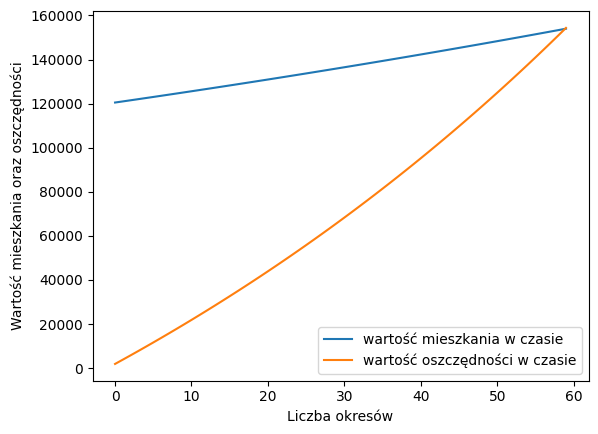

In [75]:
plt.plot(flat_price_in5year, label='wartość mieszkania w czasie')
plt.plot(wartosc_oszczednosci_w_czasie ,label='wartość oszczędności w czasie')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Wartość mieszkania oraz oszczędności')
